# Give Me Some Credit - Homework 2 by Tahmeed Rifa

## Loading and Cleaning the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the training dataset

In [2]:
df = pd.read_csv('cs-training.csv')
df = df.fillna(df['MonthlyIncome'].mean())
df

,Serial,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.000000,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.000000,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,6670.221237,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.000000,4,0,0,0,0.0


### Loading the Test dataset

In [3]:
test_data = pd.read_csv('cs-test.csv')
test_data = test_data.fillna(test_data['MonthlyIncome'].mean())
test_data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0,0.885519,43,0,0.177513,5700.00000,4,0,0,0,0.00000
1,2,0,0.463295,57,0,0.527237,9141.00000,15,0,4,0,2.00000
2,3,0,0.043275,59,0,0.687648,5083.00000,12,0,1,0,2.00000
3,4,0,0.280308,38,1,0.925961,3200.00000,7,0,2,0,0.00000
4,5,0,1.000000,27,0,0.019917,3865.00000,4,0,0,0,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,0,0.282653,24,0,0.068522,1400.00000,5,0,0,0,0.00000
101499,101500,0,0.922156,36,3,0.934217,7615.00000,8,0,2,0,4.00000
101500,101501,0,0.081596,70,0,836.000000,6855.03559,3,0,0,0,6855.03559
101501,101502,0,0.335457,56,0,3568.000000,6855.03559,8,0,2,1,3.00000


### Using PCA to extract features

In [4]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Split the dataset into features and target variable
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply PCA to the features
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Check the variance explained by each component
print(pca.explained_variance_ratio_)

# Create a new dataframe with the 3 PCA features
df_pca = pd.DataFrame(X_pca, columns=['pca_feature_1', 'pca_feature_2', 'pca_feature_3'])


[0.27233391 0.13878688 0.10050601]


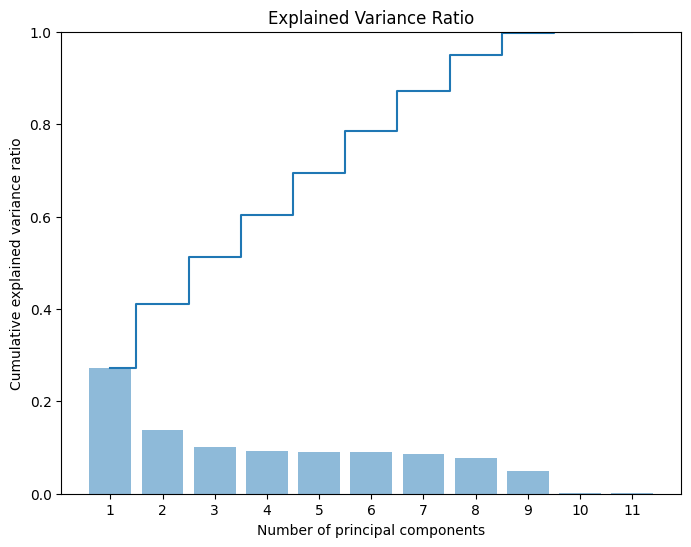

In [5]:
from sklearn.decomposition import PCA

# Apply PCA to the features
pca = PCA()
X_pca = pca.fit_transform(X)

# Calculate the cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot a bar-step graph of the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, pca.n_components_ + 1), cumulative_var_ratio, where='mid')
plt.ylabel('Cumulative explained variance ratio')
plt.xlabel('Number of principal components')
plt.xticks(range(1, pca.n_components_ + 1))
plt.ylim([0, 1])
plt.title('Explained Variance Ratio')
plt.show()


### Applying Logistic Regression using pipeline 

In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Create a pipeline with PCA and logistic regression
pipe = Pipeline([
    ('pca', PCA(n_components=3)),
    ('clf', LogisticRegression(random_state=42))
])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Predict on the testing data
y_pred = pipe.predict(X_test)

# Evaluate the accuracy of the model
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9339111111111111


In [7]:
X_test = test_data.drop('SeriousDlqin2yrs', axis=1)
y_test = test_data['SeriousDlqin2yrs']


scaler = StandardScaler()
X_test_std = scaler.fit_transform(X_test)

pca_new = PCA(n_components=3)
pca_new.fit(X_test_std)
X_new_pca = pca_new.transform(X_test_std)

# Predict the target variable on the new dataset using the pipeline
y_new_pred = pipe.predict(X_new_pca)

# Evaluate the accuracy of the model on the new dataset
accuracy_new = np.mean(y_new_pred == y_test)
print(f"Accuracy on new dataset: {accuracy_new}")


Accuracy on new dataset: 0.9837443228278967


### Gridsearching for the best hyperparameters for LR

In [8]:
# Define the hyperparameters to be tuned and their possible values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}


In [12]:
import warnings
warnings.filterwarnings('ignore')

# Create an instance of the Logistic Regression model
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(max_iter=1000, penalty=None)

# Create the GridSearchCV object
grid_search = GridSearchCV(lr, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Obtain the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:\n", best_params)


Best Hyperparameters:
 {'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg'}


### Testing accuracy of the best hyperparameters

In [13]:
lr_model = LogisticRegression(C= 0.001, solver= 'newton-cg', penalty=None)

lr_model.fit(X_train, y_train)


y_pred_lr = lr_model.predict(X_new_pca)

accuracy_new = np.mean(y_new_pred == y_test)
print(f"Accuracy on new dataset: {accuracy_new}")

Accuracy on new dataset: 0.9837443228278967
